In [82]:
import math
import matplotlib.pyplot as plt
import scipy.stats
import random
import numpy as np

In [83]:
#Funtion to perform a random walk on a number line

def random_walk(walk_length, prob):
    """
    Input: walk_length is an integer equal to the size of the sequence, prob is the probability of moving +1 which is a number between 0 and 1
    Output: a numpy.ndarray type, a vector with dimensions '1 x walk_length' containing a sequence generated by a random walk on a number line

    Random walk on a number line means that there is a probability 'prob' with which we will move by +1 and a probability '1-prob' with which we will move by -1 on the number line.
    This function generates a sequences containting the distance from the origin at each step.
    """
    #Value at index i represents the distance from origin on the i^th step
    sequence_of_distance_from_origin = np.array([0])
    for i in range(walk_length-1):

        step = random.random()

        #Probability of moving +1 is say, 0.6, which would be equivalent to a random number from 0 to 1 being less than 0.6
        if step <= prob:
            step = 1
        else:
            step = -1
        
        #To get the new distance from the origin, do 'step + however far we currently are from the origin'
        nextTermInWalk = np.array([sequence_of_distance_from_origin[-1] + step])
        sequence_of_distance_from_origin = np.append(sequence_of_distance_from_origin, nextTermInWalk) 
    return sequence_of_distance_from_origin

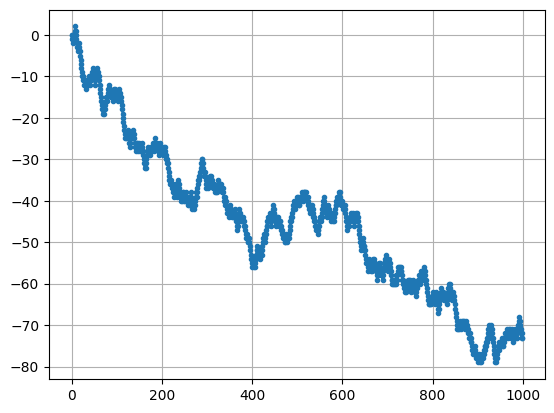

In [84]:
#Plots the distance from origin against number of steps

def plotSequence(walk_length, prob):
    """
    Input: walk_length is an integer equal to the size of the sequence, prob is the probability of moving +1 which is a number between 0 and 1
    Output: Plots a graph of the random walk with the step number on the x-axis and the distance from start on the y-axis
    """

    sequence_of_distance_from_origin = random_walk(walk_length, prob)

    plt.plot(range(walk_length),sequence_of_distance_from_origin, marker='.')

    plt.grid()


# plots a random walk with prob=0.5 i.e. with equal probability of moving forwards and backwards
plotSequence(1000, 0.5)

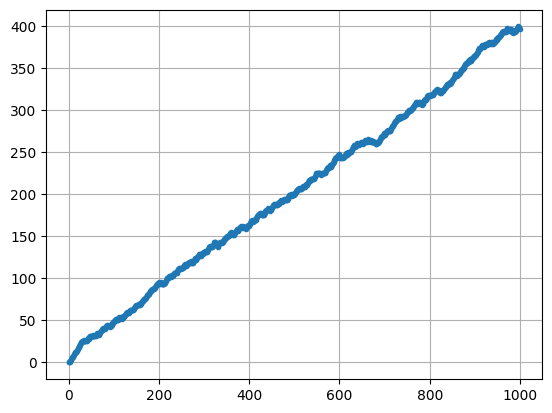

In [85]:
# plots a random walk with prob=0.7. This time we are more likely to move forwards than backwards
plotSequence(1000, 0.7)

In [86]:
def probabilityOfVisitingZero(walk_length,prob,reps):
    """
    Inputs: walk_length is the number of steps of the walk an integer, prob is the probability of moving +1, reps is the number of times walk_length-step walks are iterated
    Output: probability of EVER re-visiting 0 in an m-step random walk. So, if in a walk 0 is re-visited 10 times and in another one it is revisited 20 times, we add 1 to the zeroVisitCounter in both cases

    Here we are iterating over many walks to get an average for the percentage of times 0 is ever re-visited.
    """
    #This stores how many times zero is visited
    zeroVisitCounter = 0
    for _ in range(reps):
        if random_walk_zeroVisit(walk_length,prob) == True:
            zeroVisitCounter += 1
    probabilityOfZeroRevisit = zeroVisitCounter / reps
    return(probabilityOfZeroRevisit)



def random_walk_zeroVisit(walk_length, prob):
    """
    Inputs: walk_length is an integer equal to the size of the sequence, p is the probability of moving +1 which is a number between 0 and 1
    Output: True if zero is re-visited, False otherwise
    
    This function is very similar to the function random_walk, but here we terminate the loop when we reach 0 and return True
    """
    
    sequence = np.array([0])

    for _ in range(walk_length-1):

        step = random.random()

        if step <= prob:
            step = 1
        else:
            step = -1
        
        nextTermInSequence = np.array([sequence[-1] + step])
        if nextTermInSequence == 0:
            return True
            
        sequence = np.append(sequence, nextTermInSequence) 

    return False

In [87]:
walk_length = 2000
prob = 0.5
reps = 1000
prob_of_zero_revisit = probabilityOfVisitingZero(walk_length,prob,reps)
print(prob_of_zero_revisit)

0.986


In [88]:
prob = 0.6
prob_of_zero_revisit = probabilityOfVisitingZero(walk_length,prob,reps)
print(prob_of_zero_revisit)

0.823


In [89]:
#We expect a very similar result as with prob=0.6 since, with prob=0.4 we should be getting the same motion but in the exact opposite direction
prob = 0.4
prob_of_zero_revisit = probabilityOfVisitingZero(walk_length,prob,reps)
print(prob_of_zero_revisit)

0.785


In [90]:
#Simulates a random walk in 2D with equal probability of going N,S,W,E
def random_walk_2D(walk_length): #in this case do not need p as a parameter as we will fix the probability to 1/4 for each step
    """
    Input: walk_length is an integer equal to the size of the sequence
    Output: a numpy.ndarray type, a 'walk_length x 2' matrix containing the sequence generated

    Here the output is a matrix where i^th row represents the coordinates that we are on at the i^th step.
    """
    #the element with index i in postition_sequence respresents our position [x,y] at step i
    position_sequence = np.array([[0,0]])
    step = np.array([0,0])
    
    for i in range(walk_length - 1):
        direction = random.randint(1,4)

        if direction == 1: #every number from 1 to 4 represents a direction
            step = np.array([1,0])
        elif direction == 2:
            step = np.array([-1,0])
        elif direction == 3:
            step = np.array([0,1])
        elif direction == 4:
            step = np.array([0,-1])
        
        #To get the new coordinates do 'step + whatever our coordinates are now'
        next_term_in_sequence = np.array([position_sequence[-1] + step])

        #By using axis=0, we are essentially creating a matrix with dimensions 'walk_length x n' where n is the dimensions in which we are working in, which is 2 in this case
        #This way we are able to easily create sequences of x and y coordinates of the positions. For example position_sequence[:,0] would create a sequence of just the x-coordinates of the positions
        position_sequence = np.append(position_sequence, next_term_in_sequence, axis=0)
    return position_sequence

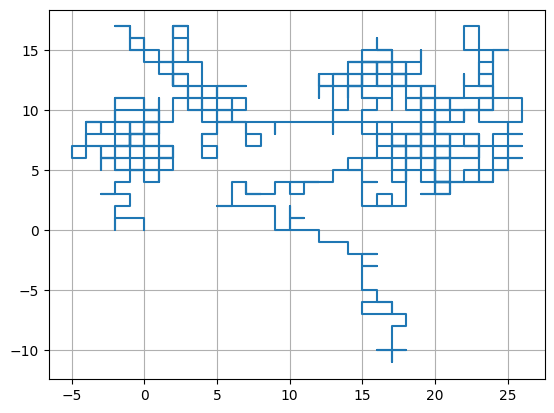

In [91]:
def plot2D(walk_length):
    """
    Input: m is an integer equal to the size of the sequence, p is the probability of moving +1 which is 
    a number between 0 and 1
    Output: Plots a graph of the 2D random walk
    """
    position_sequence = random_walk_2D(walk_length)
    plt.plot(position_sequence[:,0], position_sequence[:,1])
    plt.grid()
plot2D(1000)

Average relative error between the two graphs is: 0.018807508811042626


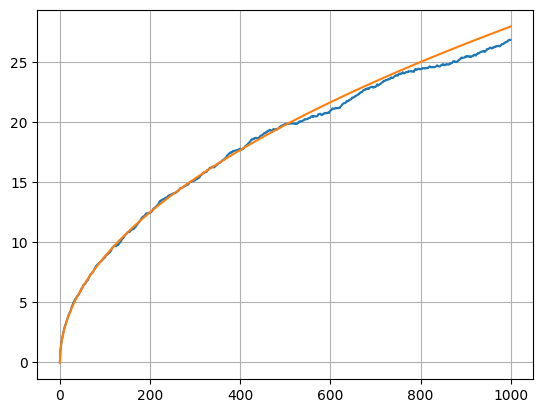

In [92]:
def random_walk_2D_distances(walk_length):
    """
    Input: walk_length is an integer equal to the length of the walk
    Output: A list of average distances to the origin at the i^th step. So, the element at the i^th index represents how far away we are from the origin at the i^th step
    """

    positions_sequence = random_walk_2D(walk_length)

    sequence_of_distances_from_origin = np.array([(i[0]**2+i[1]**2)**(1/2) for i in positions_sequence])

    return sequence_of_distances_from_origin


#==Plotting the walk and error==

reps = 500
walk_length = 1000

sequence_of_total_distances_over_all_reps = random_walk_2D_distances(walk_length)

for i in range(reps-1):
    sequence_of_total_distances_over_all_reps += random_walk_2D_distances(walk_length)

sequence_of_average_distances = sequence_of_total_distances_over_all_reps/reps

plt.plot(range(walk_length), sequence_of_average_distances)

#Now we want to estimate what function would look like the graph of sequence_of_average_distances
#The shape certainly resembles sqrt(x). By adjusting with the constnat what multiplies sqrt(x), we show that they are very similar
xs = np.linspace(0, 1000, 1000)
ys = [0.88455*math.sqrt(x) for x in xs]
plt.plot(xs, ys)
plt.grid()

#Let's also calculate the average percentage error between the 2 graphs
#First create a list of absolute error for each point
error_sequence = [abs(sequence_of_average_distances[i] - ys[i]) for i in range(walk_length)]

#Need to get rid of the first elements as they are both zero and this causes a "dividing by zero" error
error_sequence = error_sequence[1:]
sequence_of_average_distances= sequence_of_average_distances[1:]

#Now to find how much percentage error there is in the estimation we made with the sqrt(x) function, we divide the absolute error by the corresponding value of sequence_of_average_distances 
sequence_of_percentage_error = [error_sequence[i]/sequence_of_average_distances[i] for i in range(len(error_sequence))]

#To find the average percentage error we take an average of all the percentage errors
average_percentage_error = sum(sequence_of_percentage_error)/len(sequence_of_percentage_error)

print(f"Average relative error between the two graphs is: {average_percentage_error}")